In [3]:
!pip install torch torchvision scikit-learn pandas matplotlib kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 278.0 kB/s eta 0:00:00 kB/s eta 0:00:01:01
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105789 sha256=7f7b68c671db77d3e3dd8587772bcbee6a23a414f8beccf4249c821db8f50f69
  Stored in directory: /Users/nemo/Library/Caches/pip/wheels/ff/55/fb/b27a466be754d2a06ffe0e37b248d844f090a63b51becea85d
Successfully built kaggle


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, roc_auc_score

# Tải dữ liệu từ Kaggle
!kaggle datasets download -d mlg-ulb/creditcardfraud

# Giải nén dữ liệu
import zipfile
with zipfile.ZipFile("creditcardfraud.zip","r") as zip_ref:
    zip_ref.extractall()


Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('creditcard.csv')

# Kiểm tra kích thước và thông tin của dữ liệu
print(data.shape)
print(data.info())

# Xem tóm tắt về dữ liệu
print(data.describe())

# Kiểm tra tỷ lệ gian lận trong tập dữ liệu
print("Tỷ lệ gian lận:", data['Class'].value_counts(normalize=True))

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

In [3]:
# Tách dữ liệu thành đặc trưng và nhãn
X = data.drop(columns=['Class'])
y = data['Class']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Số lượng mẫu trong tập huấn luyện và tập kiểm tra
print(f"Số mẫu trong tập huấn luyện: {X_train.shape[0]}")
print(f"Số mẫu trong tập kiểm tra: {X_test.shape[0]}")

Số mẫu trong tập huấn luyện: 227845
Số mẫu trong tập kiểm tra: 56962


In [4]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('creditcard.csv')

# Kiểm tra kích thước và thông tin của dữ liệu
print(data.shape)
print(data.info())

# Tách dữ liệu thành đặc trưng và nhãn
X = data.drop(columns=['Class'])
y = data['Class']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Chuyển đổi sang tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Tạo DataLoader
train_loader = DataLoader(TensorDataset(X_train_tensor, X_train_tensor), batch_size=32, shuffle=True)


(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

In [12]:
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(input_dim, 16)
        self.fc2_mu = nn.Linear(16, latent_dim)
        self.fc2_logvar = nn.Linear(16, latent_dim)
        self.fc3 = nn.Linear(latent_dim, 16)
        self.fc4 = nn.Linear(16, input_dim)

    def encode(self, x):
        h = torch.relu(self.fc1(x))
        return self.fc2_mu(h), self.fc2_logvar(h)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = torch.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h))

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

# Khởi tạo mô hình VAE
input_dim = X_train.shape[1]
latent_dim = 5
model = VAE(input_dim, latent_dim)
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [14]:
def loss_function(recon_x, x, mu, logvar):
    BCE = nn.functional.mse_loss(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Huấn luyện mô hình
epochs = 30
model.train()
for epoch in range(epochs):
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {train_loss / len(train_loader.dataset)}')


Epoch 1, Loss: 29.154049439917756
Epoch 2, Loss: 29.149176032857785
Epoch 3, Loss: 29.146479191334635
Epoch 4, Loss: 29.14328995308502
Epoch 5, Loss: 29.144701519220476
Epoch 6, Loss: 29.142687072064113
Epoch 7, Loss: 29.143010375564028
Epoch 8, Loss: 29.140701146343343
Epoch 9, Loss: 29.144160338401814
Epoch 10, Loss: 29.136991777080798
Epoch 11, Loss: 29.13758554384742
Epoch 12, Loss: 29.13881848722081
Epoch 13, Loss: 29.1390521547359
Epoch 14, Loss: 29.13605610153224
Epoch 15, Loss: 29.136910165111477
Epoch 16, Loss: 29.134549915601944
Epoch 17, Loss: 29.13330702084875
Epoch 18, Loss: 29.128891755707443
Epoch 19, Loss: 29.13384520214623
Epoch 20, Loss: 29.13223902937501
Epoch 21, Loss: 29.131486954187064
Epoch 22, Loss: 29.12822779003943
Epoch 23, Loss: 29.128747298515595
Epoch 24, Loss: 29.128244276724196
Epoch 25, Loss: 29.124277697298243
Epoch 26, Loss: 29.122517146259312
Epoch 27, Loss: 29.126365079417038
Epoch 28, Loss: 29.12023699094357
Epoch 29, Loss: 29.13175938371093
Epoch 

In [15]:
# Đặt mô hình vào chế độ đánh giá
model.eval()
with torch.no_grad():
    X_test_pred, _, _ = model(X_test_tensor)
    reconstruction_loss = torch.mean((X_test_tensor - X_test_pred) ** 2, dim=1).numpy()

# Thiết lập ngưỡng phát hiện bất thường
threshold = np.percentile(reconstruction_loss, 90)

# Gán nhãn bất thường dựa trên ngưỡng
y_pred = (reconstruction_loss > threshold).astype(int)

# Đánh giá mô hình
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, reconstruction_loss))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.02      0.92      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.91      0.49     56962
weighted avg       1.00      0.90      0.95     56962

ROC AUC Score: 0.9624820911763692


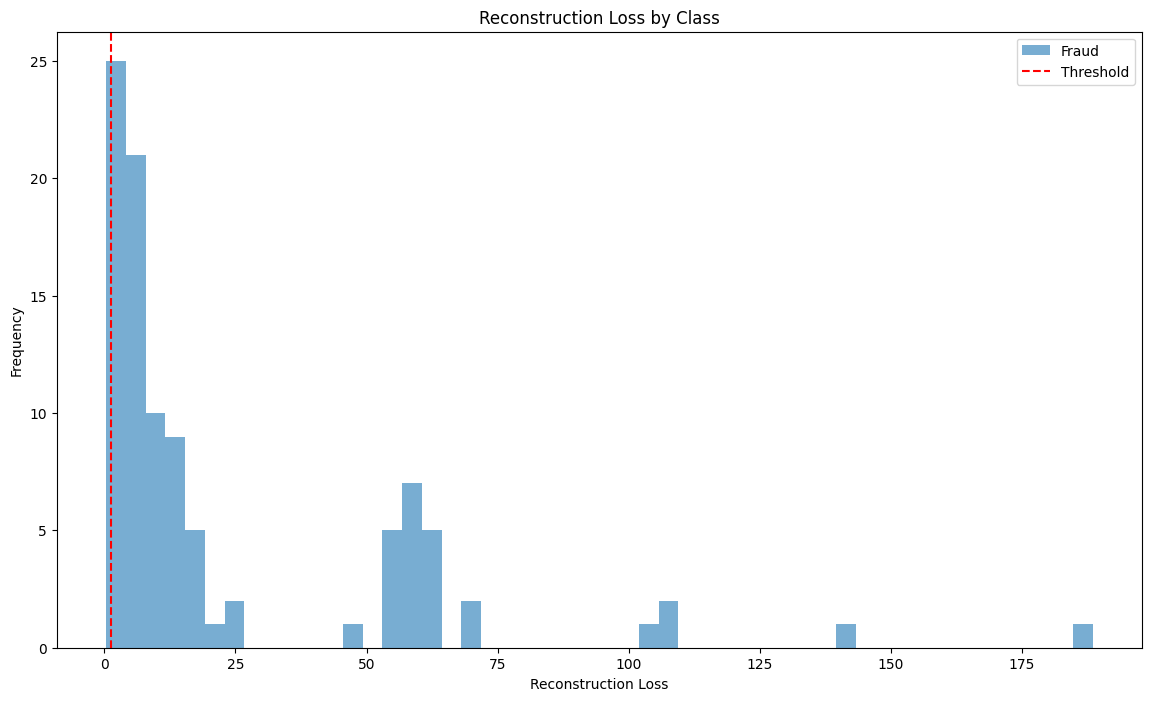

In [17]:
plt.figure(figsize=(14, 8))
plt.hist(reconstruction_loss[y_test == 0], bins=50, alpha=0.6, label='Non-Fraud')
plt.hist(reconstruction_loss[y_test == 1], bins=50, alpha=0.6, label='Fraud')
plt.axvline(threshold, color='r', linestyle='--', label='Threshold')
plt.title('Reconstruction Loss by Class')
plt.xlabel('Reconstruction Loss')
plt.ylabel('Frequency')
plt.legend()
plt.show()
